In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

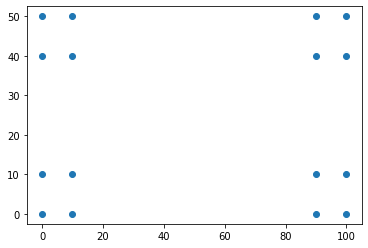

In [3]:
# plott
x = np.array([0, 0, 10, 10,  0, 10, 0, 10  , 100, 90, 90, 100, 100, 100, 90, 90 ])
y = np.array([0, 10, 10, 0,  50, 50, 40, 40, 0, 0,  10, 10, 50, 40, 50, 40])
plt.scatter(x,y)
plt.show()

In [4]:
def Distance(x, y):
    dist = np.array([np.sqrt((x[i] - x)**2 + (y[i] - y)**2) for i in range(len(x))], dtype=int)
    
    return dist

In [5]:
def Fitness(p, dist):
    popFit = p.copy()
    popFit["fitness"] = [sum(list(map(lambda x: sum(dist[x]), p.iloc[i,:-1]))) for i in range(len(p))]
    
    return popFit

In [6]:
def CreatePopulation(n_chrom, cluster, n_point, dist):
    arr_pop = np.array([np.random.permutation(n_point)[:cluster] for i in range(n_chrom)])
    pop = pd.DataFrame(arr_pop)
    
    pop["fitness"] = 0
    pop = Fitness(pop, dist)
    
    return pop

In [7]:
def Crossover(pop, dist):
    n = len(pop)
    m = len(pop.keys()) - 1
    popc = pop.copy()
    
    for i in range(n):
        n1, n2 = np.random.permutation(n)[:2]
        idx = np.random.randint(0,m)
        
        temp1 = list(pop.iloc[n1,:-1])
        temp2 = list(pop.iloc[n2,:-1])
        
        if temp1[idx] in temp2:
            temp2.remove(temp1[idx])
            temp2.insert(idx,temp1[idx])
        else:
            temp2[idx] = temp1[idx]
        temp2.append(pop.iloc[n2,-1])
        
        popc.loc[i] = temp2
    
    popc = Fitness(popc, dist)
    
    return popc

In [8]:
def Mutation(popc, dist):
    n = len(popc)
    m = len(popc.keys()) - 1
    popm = popc.copy()
    
    for i in range(n):
        temp = list(map(lambda x: x-1 if x!=0 else max(popc.iloc[i,:-1]), popc.iloc[i,:-1]))
        temp.append(popc.iloc[i,-1])
        popm.loc[i] = temp
    
    popm = Fitness(popm, dist)
    
    return popm

In [9]:
def CombineAndSelection(pop, popc, popm):
    n = len(pop)
    
    popAll = pop.copy()
    popAll = popAll.append(popc, ignore_index=True)
    popAll = popAll.append(popm, ignore_index=True)
    
    popAll = popAll.sort_values(by=['fitness'])
    popAll.index = range(len(popAll))
    
    popAll = popAll.drop_duplicates()
    popAll = popAll.head(n)
    
    return popAll

In [10]:
def PredictCluster(chrom, n_point, dist):
    arr_index = np.arange(0, n_point)
    list_cluster = [np.array(list(map(lambda x: dist[x,idx], chrom))).argmin() for idx in arr_index]
    
    return list_cluster

In [11]:
def PlotSolution(x, y, cluster, Title=""):
    arr_index = np.arange(0, len(x))
    plt.figure(figsize=(10,5))
    sns.scatterplot(x, y , hue=cluster, style=cluster, s=150, palette="Set1", legend="full")
    
    plt.legend(title="Cluster")
    plt.title(Title)
    plt.show()

In [17]:
def Solution(x, y, n_chrom=10, cluster=2, p_cross=1, p_mut=1, 
                                    max_generate=10, plot_step=False, step=1):
    
    dist = Distance(x, y)
    
    pop = CreatePopulation(n_chrom, cluster, len(x), dist)
    print('Titik populasi awal')
    print(pop.head(1))
    PlotSolution(x, y, np.zeros(len(x), dtype=int), Title="Titik sebelum clustering")
    print()

    for i in range(max_generate):
        pc = np.random.rand()
        pm = np.random.rand()

        popc = pop.copy()
        popm = pop.copy()

        if pc < p_cross:
            popc = Crossover(pop, dist)
            
        if pm < p_mut:
            popm = Mutation(popc, dist)
            
        pop = CombineAndSelection(pop, popc, popm)
        
        if plot_step and i%step==0:
            print('Titik cluster pada generasi ke',i)
            print(pop.head(1))
            list_cluster = PredictCluster(pop.iloc[0,:-1], len(x), dist)
            PlotSolution(x, y, list_cluster, Title="Proses Clustering")
            
    print()
    print('Titik cluster terbaik pada populasi akhir')
    print(pop.head(1))
    list_cluster = PredictCluster(pop.iloc[0,:-1], len(x), dist)
    PlotSolution(x, y, list_cluster, Title="Ploting Data dengan Clusstering")

Titik populasi awal
    0  1   2  3  fitness
0  14  3  11  4     3848


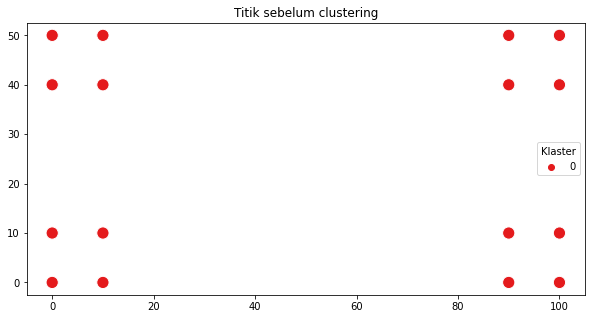


Titik cluster pada generasi ke 0
    0  1  2   3  fitness
0  10  7  9  14     3640


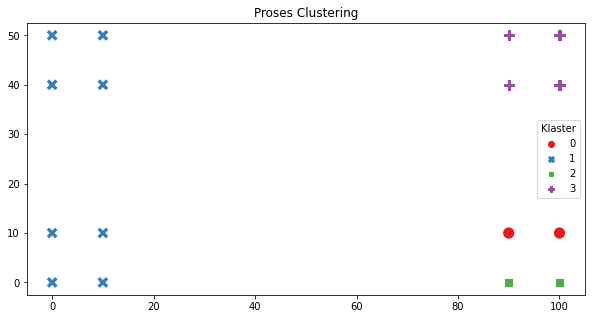

Titik cluster pada generasi ke 1
    0  1  2   3  fitness
0  10  7  9  14     3640


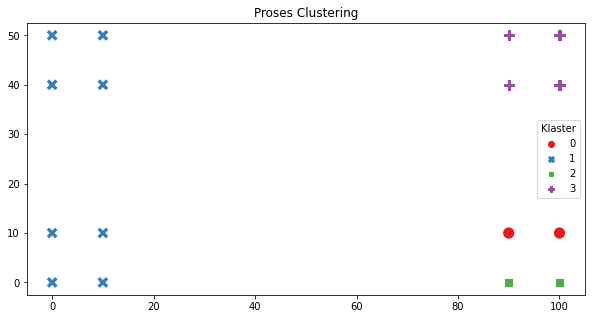

Titik cluster pada generasi ke 2
    0  1  2   3  fitness
0  10  7  9  14     3640


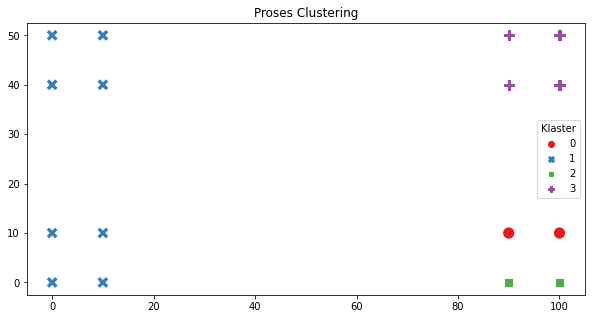

Titik cluster pada generasi ke 3
    0  1  2   3  fitness
0  10  7  9  14     3640


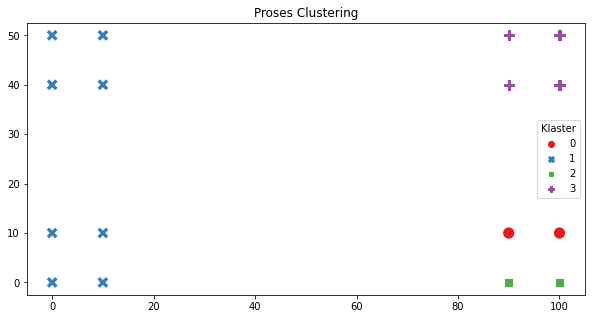

Titik cluster pada generasi ke 4
    0  1  2   3  fitness
0  10  3  2  15     3584


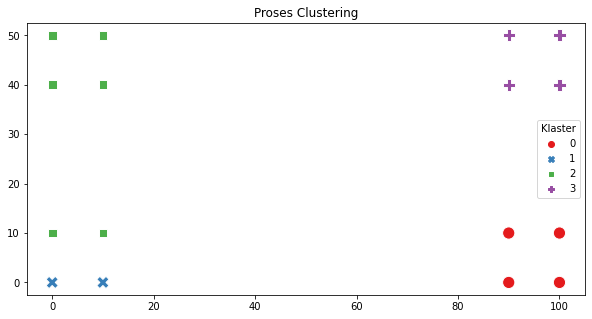

Titik cluster pada generasi ke 5
    0  1  2   3  fitness
0  10  3  2  15     3584


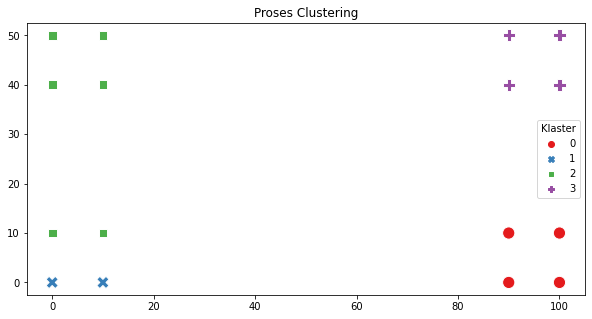

Titik cluster pada generasi ke 6
    0  1  2   3  fitness
0  10  3  2  15     3584


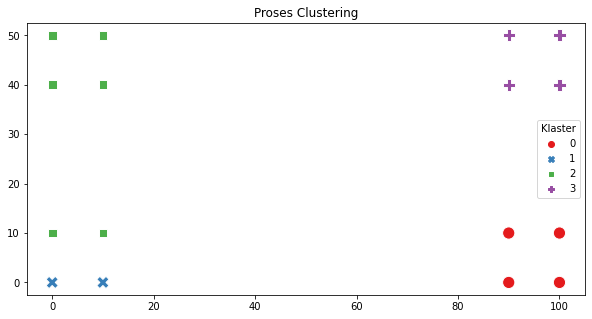

Titik cluster pada generasi ke 7
    0  1  2   3  fitness
0  10  3  2  15     3584


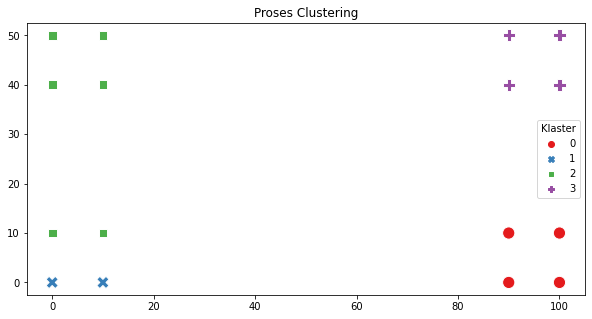

Titik cluster pada generasi ke 8
    0  1  2   3  fitness
0  10  3  2  15     3584


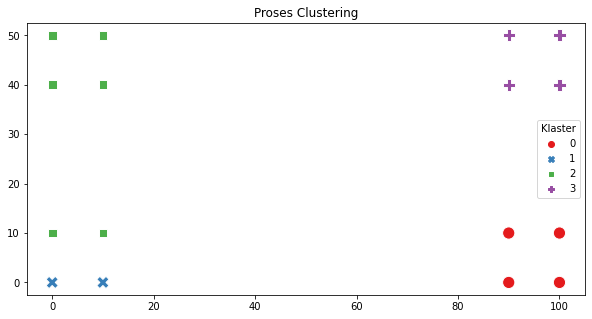

Titik cluster pada generasi ke 9
    0  1  2   3  fitness
0  10  7  2  15     3528


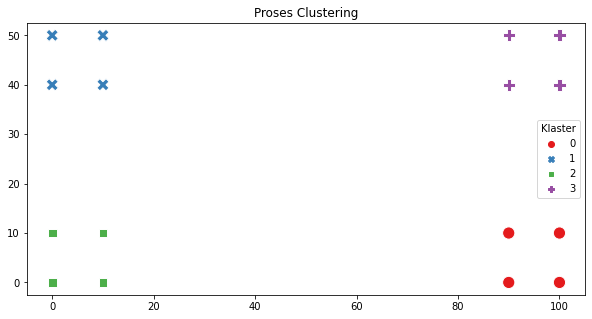

Titik cluster pada generasi ke 10
    0  1  2   3  fitness
0  10  7  2  15     3528


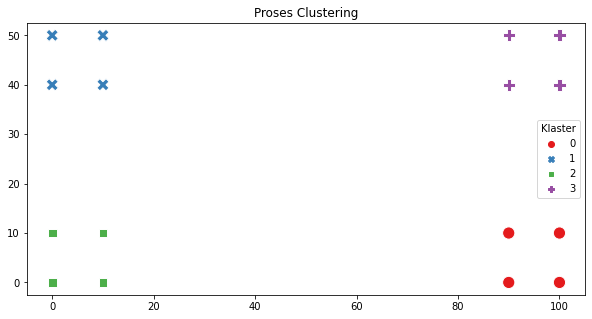

Titik cluster pada generasi ke 11
    0  1  2   3  fitness
0  10  7  2  15     3528


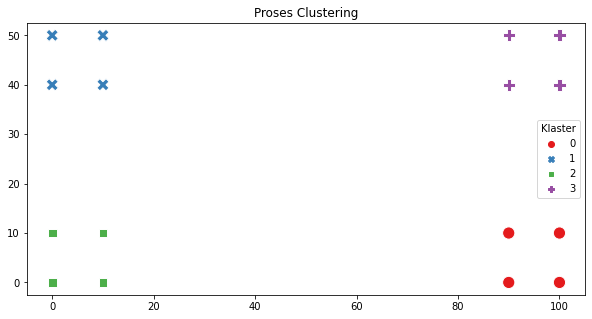

Titik cluster pada generasi ke 12
    0  1  2   3  fitness
0  10  7  2  15     3528


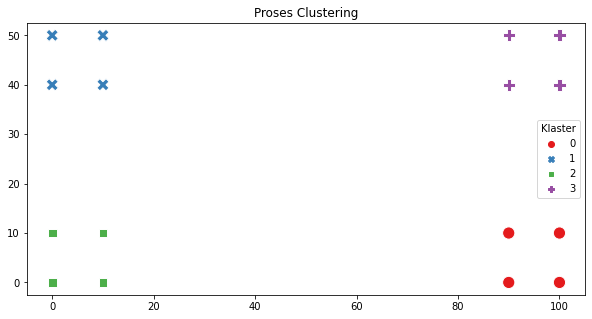

Titik cluster pada generasi ke 13
    0  1  2   3  fitness
0  10  7  2  15     3528


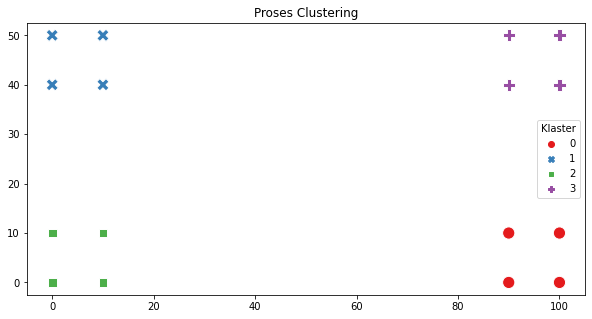

Titik cluster pada generasi ke 14
    0  1  2   3  fitness
0  10  7  2  15     3528


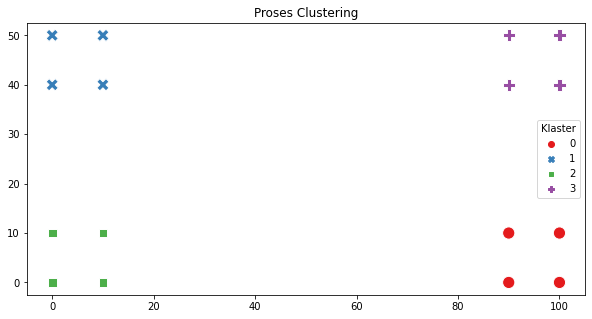

Titik cluster pada generasi ke 15
    0  1  2   3  fitness
0  10  7  2  15     3528


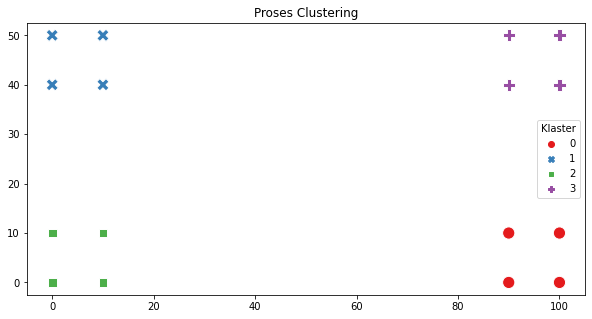

Titik cluster pada generasi ke 16
    0  1  2   3  fitness
0  10  7  2  15     3528


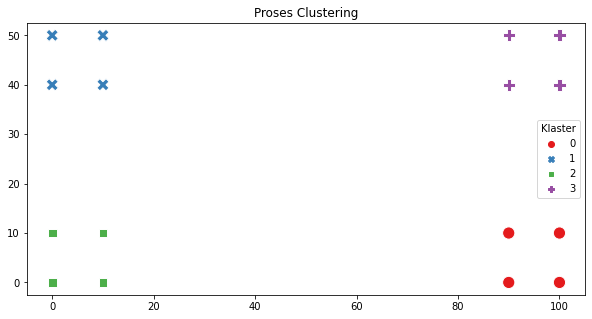

Titik cluster pada generasi ke 17
    0  1  2   3  fitness
0  10  7  2  15     3528


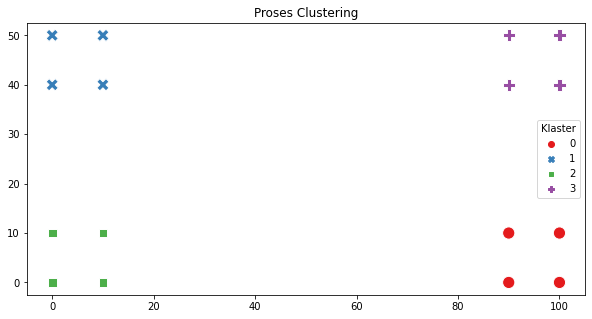

Titik cluster pada generasi ke 18
    0  1  2   3  fitness
0  10  7  2  15     3528


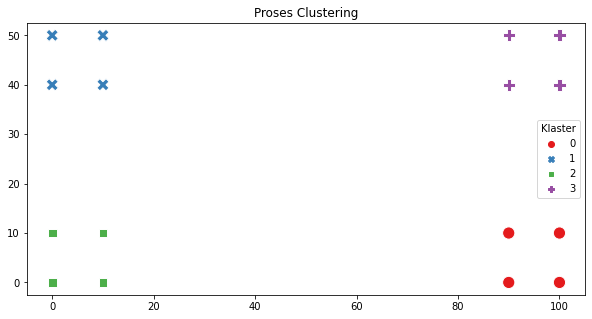

Titik cluster pada generasi ke 19
    0  1  2   3  fitness
0  10  7  2  15     3528


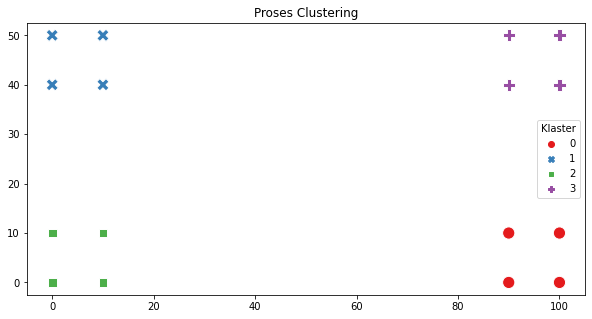


Titik cluster terbaik pada populasi akhir
    0  1  2   3  fitness
0  10  7  2  15     3528


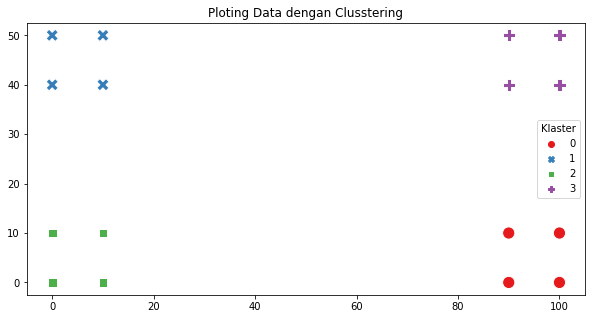

In [18]:
Solution(x, y, n_chrom=15, cluster=4, max_generate=20, plot_step=True, step=1)

## clustering dengan library Genetic Alghoritma (pygad)

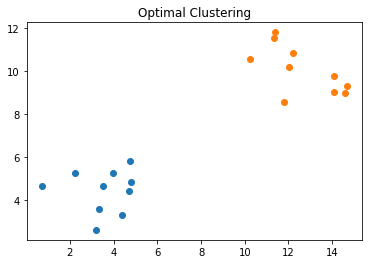

AttributeError: 'tuple' object has no attribute 'shape'

In [14]:
import numpy
import matplotlib.pyplot
import pygad

cluster1_num_samples = 10
cluster1_x1_start = 0
cluster1_x1_end = 5
cluster1_x2_start = 2
cluster1_x2_end = 6
cluster1_x1 = numpy.random.random(size=(cluster1_num_samples))
cluster1_x1 = cluster1_x1 * (cluster1_x1_end - cluster1_x1_start) + cluster1_x1_start
cluster1_x2 = numpy.random.random(size=(cluster1_num_samples))
cluster1_x2 = cluster1_x2 * (cluster1_x2_end - cluster1_x2_start) + cluster1_x2_start

cluster2_num_samples = 10
cluster2_x1_start = 10
cluster2_x1_end = 15
cluster2_x2_start = 8
cluster2_x2_end = 12
cluster2_x1 = numpy.random.random(size=(cluster2_num_samples))
cluster2_x1 = cluster2_x1 * (cluster2_x1_end - cluster2_x1_start) + cluster2_x1_start
cluster2_x2 = numpy.random.random(size=(cluster2_num_samples))
cluster2_x2 = cluster2_x2 * (cluster2_x2_end - cluster2_x2_start) + cluster2_x2_start

c1 = numpy.array([cluster1_x1, cluster1_x2]).T
c2 = numpy.array([cluster2_x1, cluster2_x2]).T

data = numpy.concatenate((c1, c2), axis=0)

matplotlib.pyplot.scatter(cluster1_x1, cluster1_x2)
matplotlib.pyplot.scatter(cluster2_x1, cluster2_x2)
matplotlib.pyplot.title("Optimal Clustering")
matplotlib.pyplot.show()

def euclidean_distance(X, Y):
    return numpy.sqrt(numpy.sum(numpy.power(X - Y, 2), axis=1))

def cluster_data(solution, solution_idx):
    global num_cluster, data
    feature_vector_length = data.shape[1]
    cluster_centers = []
    all_clusters_dists = []
    clusters = []
    clusters_sum_dist = []

    for clust_idx in range(num_clusters):
        cluster_centers.append(solution[feature_vector_length*clust_idx:feature_vector_length*(clust_idx+1)])
        cluster_center_dists = euclidean_distance(data, cluster_centers[clust_idx])
        all_clusters_dists.append(numpy.array(cluster_center_dists))

    cluster_centers = numpy.array(cluster_centers)
    all_clusters_dists = numpy.array(all_clusters_dists)

    cluster_indices = numpy.argmin(all_clusters_dists, axis=0)
    for clust_idx in range(num_clusters):
        clusters.append(numpy.where(cluster_indices == clust_idx)[0])
        if len(clusters[clust_idx]) == 0:
            clusters_sum_dist.append(0)
        else:
            clusters_sum_dist.append(numpy.sum(all_clusters_dists[clust_idx, clusters[clust_idx]]))

    clusters_sum_dist = numpy.array(clusters_sum_dist)

    return cluster_centers, all_clusters_dists, cluster_indices, clusters, clusters_sum_dist

def fitness_func(solution, solution_idx):
    _, _, _, _, clusters_sum_dist = cluster_data(solution, solution_idx)

    fitness = 1.0 / (numpy.sum(clusters_sum_dist) + 0.00000001)

    return fitness

num_clusters = 2
num_genes = num_clusters * data.shape[1]

ga_instance = pygad.GA(num_generations=100,
                       sol_per_pop=10,
                       num_parents_mating=5,
                       init_range_low=-6,
                       init_range_high=20,
                       keep_parents=2,
                       num_genes=num_genes,
                       fitness_func=fitness_func,
                       suppress_warnings=True)

ga_instance.run()

best_solution, best_solution_fitness, best_solution_idx = ga_instance.best_solution()
print("Best solution is {bs}".format(bs=best_solution))
print("Fitness of the best solution is {bsf}".format(bsf=best_solution_fitness))
print("Best solution found after {gen} generations".format(gen=ga_instance.best_solution_generation))

cluster_centers, all_clusters_dists, cluster_indices, clusters, clusters_sum_dist = cluster_data(best_solution, best_solution_idx)

for cluster_idx in range(num_clusters):
    cluster_x = data[clusters[cluster_idx], 0]
    cluster_y = data[clusters[cluster_idx], 1]
    matplotlib.pyplot.scatter(cluster_x, cluster_y)
    matplotlib.pyplot.scatter(cluster_centers[cluster_idx, 0], cluster_centers[cluster_idx, 1], linewidths=5)
matplotlib.pyplot.title("Clustering using PyGAD")
matplotlib.pyplot.show()

In [ ]:
import numpy
import matplotlib.pyplot
import pygad

cluster1_num_samples = 20
cluster1_x1_start = 0
cluster1_x1_end = 5
cluster1_x2_start = 2
cluster1_x2_end = 6
cluster1_x1 = numpy.random.random(size=(cluster1_num_samples))
cluster1_x1 = cluster1_x1 * (cluster1_x1_end - cluster1_x1_start) + cluster1_x1_start
cluster1_x2 = numpy.random.random(size=(cluster1_num_samples))
cluster1_x2 = cluster1_x2 * (cluster1_x2_end - cluster1_x2_start) + cluster1_x2_start

cluster2_num_samples = 20
cluster2_x1_start = 4
cluster2_x1_end = 12
cluster2_x2_start = 14
cluster2_x2_end = 18
cluster2_x1 = numpy.random.random(size=(cluster2_num_samples))
cluster2_x1 = cluster2_x1 * (cluster2_x1_end - cluster2_x1_start) + cluster2_x1_start
cluster2_x2 = numpy.random.random(size=(cluster2_num_samples))
cluster2_x2 = cluster2_x2 * (cluster2_x2_end - cluster2_x2_start) + cluster2_x2_start

cluster3_num_samples = 20
cluster3_x1_start = 12
cluster3_x1_end = 18
cluster3_x2_start = 8
cluster3_x2_end = 11
cluster3_x1 = numpy.random.random(size=(cluster3_num_samples))
cluster3_x1 = cluster3_x1 * (cluster3_x1_end - cluster3_x1_start) + cluster3_x1_start
cluster3_x2 = numpy.random.random(size=(cluster3_num_samples))
cluster3_x2 = cluster3_x2 * (cluster3_x2_end - cluster3_x2_start) + cluster3_x2_start

c1 = numpy.array([cluster1_x1, cluster1_x2]).T
c2 = numpy.array([cluster2_x1, cluster2_x2]).T
c3 = numpy.array([cluster3_x1, cluster3_x2]).T

data = numpy.concatenate((c1, c2, c3), axis=0)

matplotlib.pyplot.scatter(cluster1_x1, cluster1_x2)
matplotlib.pyplot.scatter(cluster2_x1, cluster2_x2)
matplotlib.pyplot.scatter(cluster3_x1, cluster3_x2)
matplotlib.pyplot.title("Optimal Clustering")
matplotlib.pyplot.show()

def euclidean_distance(X, Y):
    return numpy.sqrt(numpy.sum(numpy.power(X - Y, 2), axis=1))

def cluster_data(solution, solution_idx):
    global num_clusters, feature_vector_length, data
    cluster_centers = []
    all_clusters_dists = []
    clusters = []
    clusters_sum_dist = []

    for clust_idx in range(num_clusters):
        cluster_centers.append(solution[feature_vector_length*clust_idx:feature_vector_length*(clust_idx+1)])
        cluster_center_dists = euclidean_distance(data, cluster_centers[clust_idx])
        all_clusters_dists.append(numpy.array(cluster_center_dists))

    cluster_centers = numpy.array(cluster_centers)
    all_clusters_dists = numpy.array(all_clusters_dists)

    cluster_indices = numpy.argmin(all_clusters_dists, axis=0)
    for clust_idx in range(num_clusters):
        clusters.append(numpy.where(cluster_indices == clust_idx)[0])
        if len(clusters[clust_idx]) == 0:
            clusters_sum_dist.append(0)
        else:
            clusters_sum_dist.append(numpy.sum(all_clusters_dists[clust_idx, clusters[clust_idx]]))

    clusters_sum_dist = numpy.array(clusters_sum_dist)

    return cluster_centers, all_clusters_dists, cluster_indices, clusters, clusters_sum_dist

def fitness_func(solution, solution_idx):
    _, _, _, _, clusters_sum_dist = cluster_data(solution, solution_idx)

    fitness = 1.0 / (numpy.sum(clusters_sum_dist) + 0.00000001)

    return fitness

num_clusters = 3
feature_vector_length = data.shape[1]
num_genes = num_clusters * feature_vector_length

ga_instance = pygad.GA(num_generations=100,
                       sol_per_pop=10,
                       init_range_low=0,
                       init_range_high=20,
                       num_parents_mating=5,
                       keep_parents=2,
                       num_genes=num_genes,
                       fitness_func=fitness_func,
                       suppress_warnings=True)

ga_instance.run()

best_solution, best_solution_fitness, best_solution_idx = ga_instance.best_solution()
print("Best solution is {bs}".format(bs=best_solution))
print("Fitness of the best solution is {bsf}".format(bsf=best_solution_fitness))
print("Best solution found after {gen} generations".format(gen=ga_instance.best_solution_generation))

cluster_centers, all_clusters_dists, cluster_indices, clusters, clusters_sum_dist = cluster_data(best_solution, best_solution_idx)

for cluster_idx in range(num_clusters):
    cluster_x = data[clusters[cluster_idx], 0]
    cluster_y = data[clusters[cluster_idx], 1]
    matplotlib.pyplot.scatter(cluster_x, cluster_y)
    matplotlib.pyplot.scatter(cluster_centers[cluster_idx, 0], cluster_centers[cluster_idx, 1], linewidths=5)
matplotlib.pyplot.title("Clustering using PyGAD")
matplotlib.pyplot.show()